# Multidimensional data

This notebook looks at 2D data (tables, matrices, rasters, and so on) and 3D data like seismic volumes.


## Working with 2D data

We have seen that `list`s and numpy `nd.array`s work well for 1D data like logs, but we will often want to work with 2D data of some kind. In this notebook we will explore how to work with something like a horizon, using numpy.

Let us start by loading our data. We are using a library named `pooch` to download them to a specific location on our hard drive. If we come back to this, the files will only be downloaded again if they have changed on the server or been deleted.

In [8]:
import pooch

spot = pooch.create(path='../data', base_url="https://geocomp.s3.amazonaws.com/data/",
                    registry={"F3_8-bit_int.sgy": "md5:cbde973eb6606da843f40aedf07793e4",
                              "F3_horizon.txt": None})

fname = spot.fetch("F3_horizon.txt")

We are also going to import `numpy` and `matplotlib` here, since we will use them throughout the notebook:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
horizon = np.loadtxt(fname)
horizon

array([[0.85877, 0.85878, 0.85879, ..., 0.52126, 0.52126, 0.52125],
       [0.85876, 0.85878, 0.85878, ..., 0.52125, 0.52125, 0.52123],
       [0.85876, 0.85877, 0.85879, ..., 0.52124, 0.52124, 0.52122],
       ...,
       [0.75407, 0.75403, 0.75402, ..., 0.49692, 0.49628, 0.49628],
       [0.75404, 0.754  , 0.75399, ..., 0.49625, 0.49625, 0.4962 ],
       [0.75401, 0.75397, 0.75396, ..., 0.49621, 0.49616, 0.49621]])

This is _raster_ data, where each cell in a grid has a value associated with it. We can not see all of the individual values above, but we can easily plot it, using matplotlib's `imshow` function:

array([[0.85877109, 0.85878152, 0.85878676, ..., 0.52126116, 0.52125591,
        0.52124548],
       [0.85876209, 0.85877776, 0.85878301, ..., 0.52124923, 0.52124923,
        0.52123356],
       [0.85875702, 0.85876751, 0.85879368, ..., 0.52124089, 0.52123564,
        0.52121991],
       ...,
       [0.75406915, 0.7540341 , 0.75402093, ..., 0.49692005, 0.49628457,
        0.49628016],
       [0.75403804, 0.75400299, 0.75398982, ..., 0.49624899, 0.49624899,
        0.49619639],
       [0.75400573, 0.75397068, 0.75395757, ..., 0.49621293, 0.49615601,
        0.49620855]])

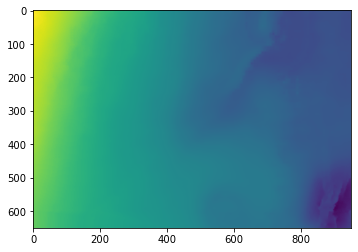

In [4]:
plt.imshow(horizon)

The `imshow` function is a very useful one, and has a fair few options to control exactly how the result looks. We are going to start using a slightly different way of creating plots, using the so-called _object oriented_ paradigm. This is the recommended way in the matplotlib documentation, and what we will be using going forwards:

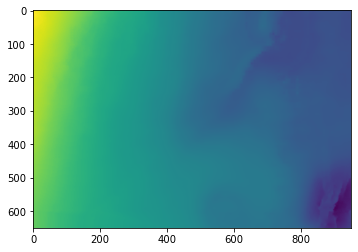

In [5]:
fig, ax = plt.subplots()

ax.imshow(horizon)

This looks very much like we had before, but gives us more flexibility than calling `plt.imshow` directly, especially if we want more than one plot on the same figure. We will see this more as we continue.

## 2D NumPy arrays

Let us take a look at the `horizon` object more closely and see what we can do with it:

In [6]:
type(horizon)

numpy.ndarray

In [7]:
horizon.shape

(651, 951)

In [8]:
horizon.ndim

2

In [9]:
len(horizon), horizon.size

(651, 619101)

In [10]:
horizon.min(), horizon.max(), horizon.mean(), horizon.std()

(0.41542801261, 0.86045861244, 0.6224201561288771, 0.08198653819986433)

In [11]:
np.min(horizon), np.max(horizon), np.mean(horizon), np.std(horizon)

(0.41542801261, 0.86045861244, 0.6224201561288771, 0.08198653819986433)

We can plot the distribution using `hist` as we saw in the previous notebook, but we need to make sure that the ndarray is one-dimensional (otherwise it will plot hundreds of histograms, rather than one histogram of the entire horizon). The easiest way is to use the `ravel` method:

In [12]:
horizon.ravel().shape, horizon.ravel().ndim

((619101,), 1)

In [13]:
horizon.ravel()

array([0.85877109, 0.85878152, 0.85878676, ..., 0.49621293, 0.49615601,
       0.49620855])

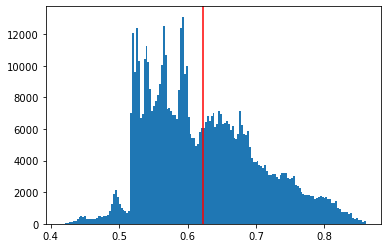

In [14]:
fig, ax = plt.subplots()
ax.hist(horizon.ravel(), bins='auto')
ax.axvline(horizon.mean(), color='red')

Instead of `ravel`, we could also use `reshape`. This is more general, as long as the shape of the resultant `ndarray` fits. In this case the proper value for `-1` is inferred from the length of the array and remaining dimensions. We will still get a 2D array, but we only want the first element:

In [15]:
horizon.reshape(1, -1).size, horizon.reshape(1, -1).shape, horizon.reshape(1, -1)

(619101,
 (1, 619101),
 array([[0.85877109, 0.85878152, 0.85878676, ..., 0.49621293, 0.49615601,
         0.49620855]]))

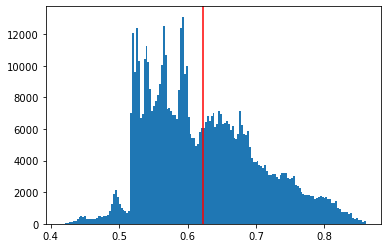

In [16]:
fig, ax = plt.subplots()
ax.hist(horizon.reshape(1, -1)[0], bins='auto')
ax.axvline(horizon.mean(), color='red')

## Indexing and slicing

We have already seen how to index and slice in one dimension. This is slightly different in two dimensions:

In [17]:
horizon

array([[0.85877109, 0.85878152, 0.85878676, ..., 0.52126116, 0.52125591,
        0.52124548],
       [0.85876209, 0.85877776, 0.85878301, ..., 0.52124923, 0.52124923,
        0.52123356],
       [0.85875702, 0.85876751, 0.85879368, ..., 0.52124089, 0.52123564,
        0.52121991],
       ...,
       [0.75406915, 0.7540341 , 0.75402093, ..., 0.49692005, 0.49628457,
        0.49628016],
       [0.75403804, 0.75400299, 0.75398982, ..., 0.49624899, 0.49624899,
        0.49619639],
       [0.75400573, 0.75397068, 0.75395757, ..., 0.49621293, 0.49615601,
        0.49620855]])

In [18]:
horizon[0] # just the first dimension

array([0.85877109, 0.85878152, 0.85878676, 0.85877627, 0.85877109,
       0.85873967, 0.85857743, 0.85816401, 0.85748369, 0.85659403,
       0.8555997 , 0.85462105, 0.85374713, 0.85304064, 0.85250157,
       0.85204631, 0.85152817, 0.85085833, 0.85007334, 0.84926742,
       0.84854001, 0.84793818, 0.84744102, 0.8469491 , 0.84635246,
       0.8456198 , 0.84480345, 0.84400272, 0.84329623, 0.8427363 ,
       0.84229147, 0.84185708, 0.84132856, 0.84066916, 0.839926  ,
       0.83920383, 0.83859676, 0.83814144, 0.83774894, 0.83728844,
       0.8366552 , 0.83584404, 0.83490205, 0.83393389, 0.83305997,
       0.8323639 , 0.83185107, 0.8314324 , 0.83098233, 0.83043808,
       0.82982057, 0.82918209, 0.82859075, 0.82808834, 0.8276906 ,
       0.82732952, 0.82691085, 0.8263666 , 0.82572812, 0.8250792 ,
       0.82450354, 0.82403779, 0.82369238, 0.82338363, 0.82300681,
       0.82248348, 0.82179272, 0.82098156, 0.82013899, 0.81935924,
       0.81869984, 0.81811893, 0.81754851, 0.81692576, 0.81622

In [19]:
horizon[0, 3]

0.85877627134

In [20]:
horizon[0, :10]

array([0.85877109, 0.85878152, 0.85878676, 0.85877627, 0.85877109,
       0.85873967, 0.85857743, 0.85816401, 0.85748369, 0.85659403])

In [21]:
horizon[:10, 0]

array([0.85877109, 0.85876209, 0.85875702, 0.85873199, 0.85873681,
       0.85863125, 0.85859221, 0.85861278, 0.85879016, 0.8589533 ])

In [22]:
horizon[:10, 0:5]

array([[0.85877109, 0.85878152, 0.85878676, 0.85877627, 0.85877109],
       [0.85876209, 0.85877776, 0.85878301, 0.85877252, 0.85877252],
       [0.85875702, 0.85876751, 0.85879368, 0.85875702, 0.85876751],
       [0.85873199, 0.85875815, 0.85875815, 0.85874242, 0.85875815],
       [0.85873681, 0.85873157, 0.85886252, 0.85869491, 0.85874206],
       [0.85863125, 0.85864699, 0.85855269, 0.85864174, 0.85875177],
       [0.85859221, 0.8585555 , 0.85857648, 0.85860789, 0.85866028],
       [0.85861278, 0.85860229, 0.85849231, 0.85849756, 0.85854471],
       [0.85879016, 0.85877448, 0.85885304, 0.85875875, 0.85871685],
       [0.8589533 , 0.85895854, 0.85895854, 0.8588382 , 0.85881203]])

It is important to note that we are getting back a view into the array, so we can do things like we saw above:

In [23]:
horizon[:10, 0:5].size, horizon[:10, 0:5].shape

(50, (10, 5))

In [24]:
horizon[:10, 0:5].min(), horizon[:10, 0:5].max(), horizon[:10, 0:5].mean()

(0.8584923148200001, 0.85895854235, 0.8587298882004)

We can also show this more visually:

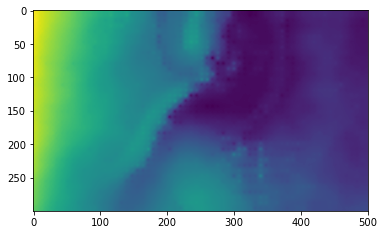

In [25]:
fig, ax = plt.subplots()

ax.imshow(horizon[:300, 450:])

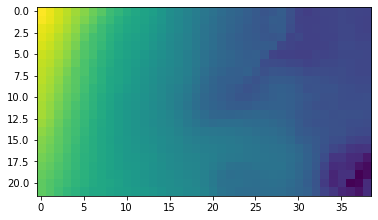

In [26]:
fig, ax = plt.subplots()

ax.imshow(horizon[::30, ::25])

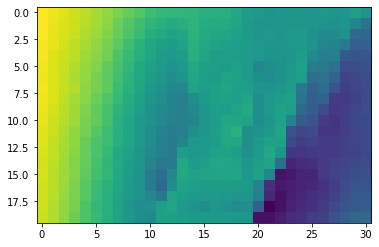

In [27]:
fig, ax = plt.subplots()

ax.imshow(horizon[500:600:5, 800::5])

## Boolean indexing

We have seen how this can work for 1D data, and we can do the same sort of thing for 2D:

In [28]:
horizon > 0.6

array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])

In [29]:
b_horizon = horizon > 0.6
b_horizon.shape, horizon.shape

((651, 951), (651, 951))

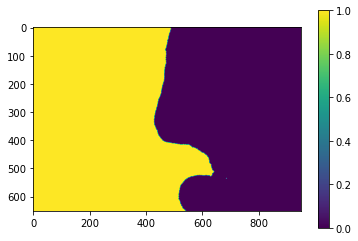

In [30]:
fig, ax = plt.subplots()

im = ax.imshow(b_horizon)
plt.colorbar(im)

Having a boolean numpy array can let us do things to only part of our array, such as masking data:

In [31]:
masked = horizon.copy()
masked[horizon > 0.6] = np.nan

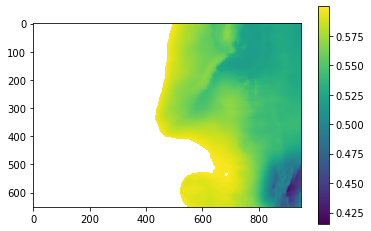

In [32]:
fig, ax = plt.subplots()
im = ax.imshow(masked)
plt.colorbar(im)

Combining binary tests on numpy array uses a different syntax to normal binary combinations. We need to use bitwise combinators, rather than the normal ones we have previously introduced:

| Standard Operator | Bitwise Equivalent |                        Description                       |
|:-----------------:|:------------------:|:--------------------------------------------------------:|
|         or        |         \|         |     True if element matches either of two conditions     |
|        and        |          &         |      True if element matches both of two conditions      |
|        xor        |          ^         | True if element matches in exactly one of two conditions |
|        not        |          ~         |                   Invert boolean array                   |

### EXERCISE

1. Select a square area of interest (call it `area`) in `horizon`, pick whichever area you like but make sure its dimensions are equal (e.g. `area.shape` of `x, y` where `x == y`).
2. Make a plot of your area of interest `area` and display a colorbar.
3. Use numpy functions to get the min and max values of `area`.
4. Normalize this area between the values of `0` and `1`, **<a title="You can use `np.interp` for example, make sure to read the docs for usage. You'll need your input `area`, a tuple of min and max for the array, and a tuple of limits 0 and 1.">Hover for hint.</a>**
5. Plot the normalized area with a colorbar.

In [ ]:
# YOUR CODE HERE



In [34]:
area = horizon[-150:, -150:]
area.shape

(150, 150)

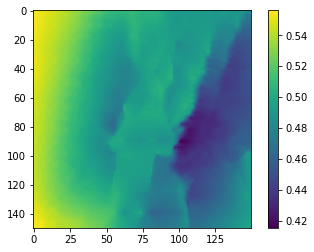

In [35]:
fig, ax = plt.subplots()
im = ax.imshow(area)
fig.colorbar(im)

In [36]:
minn, maxx = area.min(), area.max()

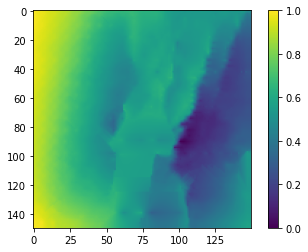

In [37]:
normed_area = np.interp(area, (minn, maxx), (0, 1)) 
plt.imshow(normed_area)
plt.colorbar()

## More `imshow` options

`imshow` is the standard way to view raster data using matplotlib. It has a number of options to facilitate that, so let us take a look at a couple of them.

The default for `imshow` is to have the origin (0, 0) to the top-left, but we want it to be bottom left. We can do that by passing the argument `origin=lower` to `imshow`. We can also change the colour map with `cmap`:

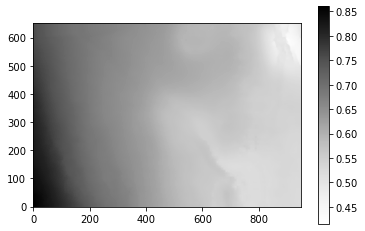

In [38]:
fig, ax = plt.subplots()

im = ax.imshow(horizon, cmap='Greys',
               origin='lower',
              )
plt.colorbar(im, ax=ax)

Colour maps are reversible by adding `_r` at the end of the name:

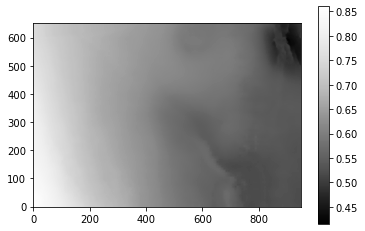

In [39]:
fig, ax = plt.subplots()

im = ax.imshow(horizon, cmap='Greys_r',
               origin='lower',
              )
plt.colorbar(im, ax=ax)

We can also make the plots aware of real-world co-ordinates, such as inline/xline numbers. We can do this with the `extents` argument, which is a list (or similar data structure) with elements in the order left, right, bottom, top. Note that this is not a true georeferencing of the data: it simply gets values for the corner points in a rectangular reference frame. If you require more than that, look into libraries like GDAL or xarray.

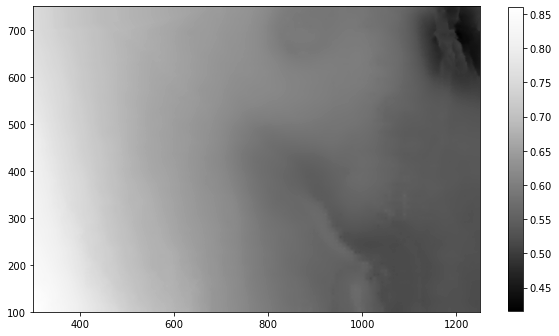

In [40]:
fig, ax = plt.subplots(figsize=(10, 8))

im = ax.imshow(horizon, cmap='Greys_r',
               origin='lower',
               extent=[300, 1250, 100, 750], # we need to get these from somewhere else
              )
plt.colorbar(im, ax=ax, shrink=0.7)

We can also change the interpolation used. See [the docs](https://matplotlib.org/stable/gallery/images_contours_and_fields/interpolation_methods.html) for an overview.

Text(0.5, 1.0, 'Bicubic Interpolation')

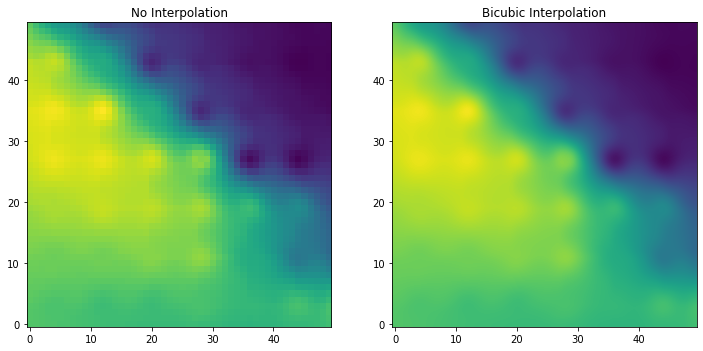

In [41]:
fig, axs = plt.subplots(figsize=(12, 8), ncols=2)

im1 = axs[0].imshow(horizon[100:150, 650:700],
               origin='lower',
               interpolation='none',
              )
axs[0].set_title('No Interpolation')

im2 = axs[1].imshow(horizon[100:150, 650:700],
               origin='lower',
               interpolation='bicubic',
              )
axs[1].set_title('Bicubic Interpolation')

## More dimensions

The above concepts work for more than two dimensions. Numpy can handle up to 32 dimensions, which is hopefully enough for your use-case!

 We can take a look at a 3D survey, for example:

In [42]:
import segyio

# Load some seismic
fname = spot.fetch('F3_8-bit_int.sgy')

with segyio.open(fname) as s:
    vol = segyio.cube(s)

In [43]:
type(vol)

numpy.ndarray

In [44]:
vol.shape

(225, 300, 463)

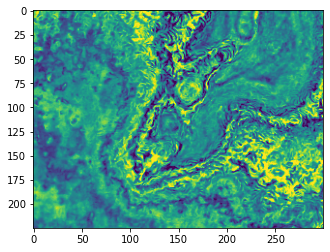

In [45]:
fig, ax = plt.subplots()

ax.imshow(vol[:, :, 300])

### EXERCISE

- Try plotting a vertical section through the data. You'll need to think about indexing into `vol`. It might look a little strange, but we can talk about how to fix that, so do not get too hung-up on it.
- Can you make a histogram of the amplitudes? Tip: Use only one slice of the data and use the `ravel()` method on it to change it into a 1D array. If there are NaNs in the data, you may need to deal with them.

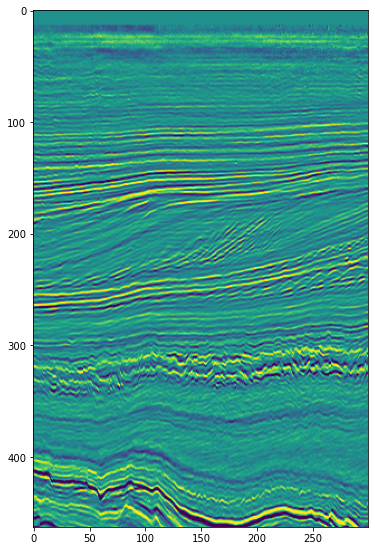

In [47]:
fig, ax = plt.subplots(figsize=(6, 10))
ax.imshow(vol[200, :, :].T)

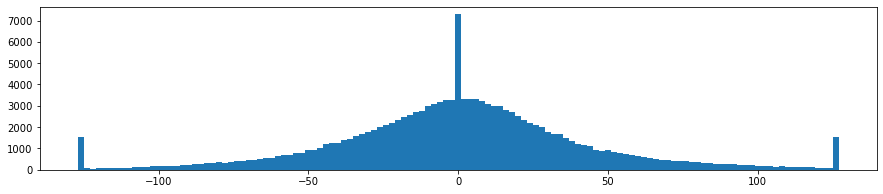

In [48]:
# The main trick is that you have to flatten the array:
fig, ax = plt.subplots(figsize=(15, 3))
n, bins, _ = ax.hist(vol[200, :, :].ravel(), bins=127, range=(-127, 127))
# ax.set_yscale('log', nonpositive='clip')

## Further reading

The data that we are talking about here is gridded data with a value at each `X`, `Y`, `Z`, `...` location.
Numpy provides an excellent way of handling this sort of multi-dimensional data, and the documentation is well worth reading (and well-written). In particular, take a look at the [user guide](https://numpy.org/doc/stable/user/index.html#user), and possibly the [absolute beginner guide](https://numpy.org/doc/stable/user/absolute_beginners.html).

Numpy is not suited for handling all types of data, particularly if you want to work with text of some kind, or mixed data. However, it is excellent at handling numerical data, and forms the base of other libraries that might be of use. [SciPy](https://scipy.github.io/devdocs/tutorial/index.html#user-guide) is a good example that uses numpy to handle the low-level mathematical operations behind signal processing and interpolation and such things.

---

&copy; 2022 Agile Scientific, CC BY